In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from manify.manifolds import ProductManifold
from manify.curvature_estimation.delta_hyperbolicity import delta_hyperbolicity
from manify.curvature_estimation.sectional_curvature import sectional_curvature
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


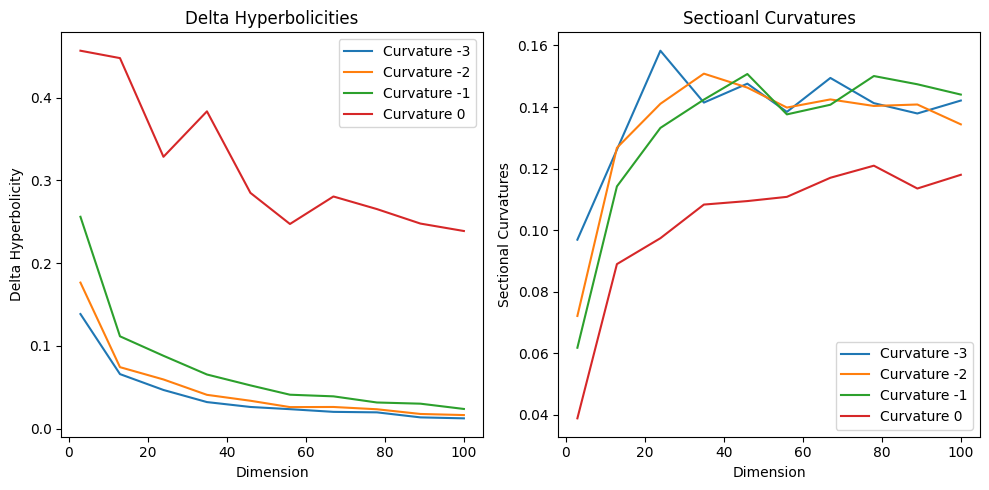

In [37]:
# Curvatures and Dimension in hyperbolic distance metrics
N = 50  # Number of points per sample

dims = np.linspace(3,100,10, dtype=int).tolist()
curvatures = [-3,-2,-1, 0]

# Initialize arrays to store all samples
deltas = [[] for _ in curvatures]
sec_curvs = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        pm = ProductManifold(signature=[(k, dim)])
        X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
        dists = pm.pdist(X)
        deltas[i].append(delta_hyperbolicity(dists,method="global"))
        sec_curvs[i].append(sectional_curvature(dists, method="global"))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    axs[0].plot(dims, deltas[i], label=f'Curvature {k}')
    axs[1].plot(dims, sec_curvs[i], label=f'Curvature {k}')

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Delta Hyperbolicities')

axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Sectional Curvatures')
axs[1].set_title('Sectioanl Curvatures')

plt.tight_layout()
plt.show() 

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


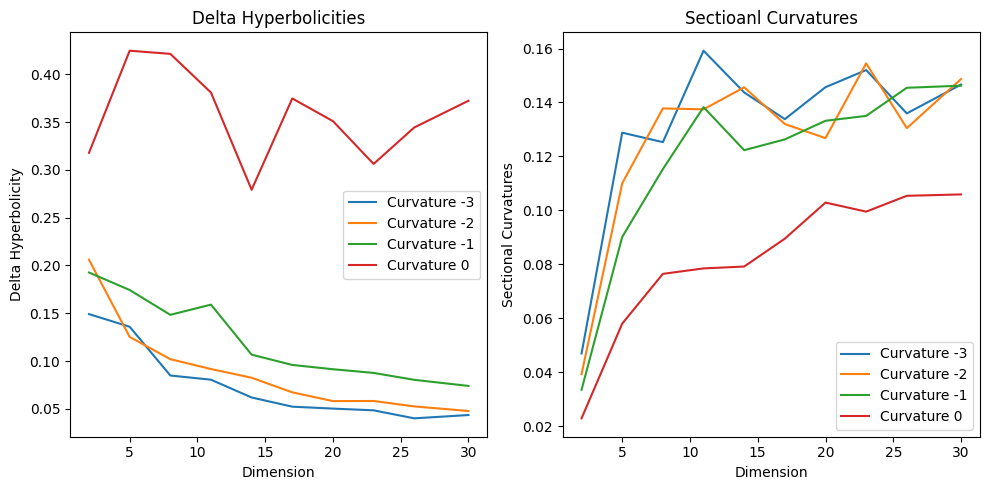

In [38]:
# Curvatures and Dimension in hyperbolic distance metrics
N = 50  # Number of points per sample

dims = np.linspace(2,30,10, dtype=int).tolist()
curvatures = [-3,-2,-1, 0]

# Initialize arrays to store all samples
deltas = [[] for _ in curvatures]
sec_curvs = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        pm = ProductManifold(signature=[(k, dim)])
        X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
        dists = pm.pdist(X)
        deltas[i].append(delta_hyperbolicity(dists, method="global"))
        sec_curvs[i].append(sectional_curvature(dists, method="global"))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    axs[0].plot(dims, deltas[i], label=f'Curvature {k}')
    axs[1].plot(dims, sec_curvs[i], label=f'Curvature {k}')

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Delta Hyperbolicities')

axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Sectional Curvatures')
axs[1].set_title('Sectioanl Curvatures')

plt.tight_layout()
plt.show() 